## <center> <u> Multiple Linear Regression

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor

from sklearn.svm import SVR,LinearSVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')


### Loading the Dataset

In [2]:
data = pd.read_csv('./Admission_Predict_Ver1.1.csv')
data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


### Shape of the Data

In [3]:
data.shape

(500, 9)

In [4]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Columns

In [5]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
data.duplicated().sum()

0

### Null values

In [8]:
data.isnull().mean()*100

Serial No.           0.0
GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

In [9]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [10]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

### Drop Columns

In [11]:
data.drop(columns='Serial No.', inplace=True)

## Univariate Analysis

In [12]:
univariate_list = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA','Chance of Admit ']

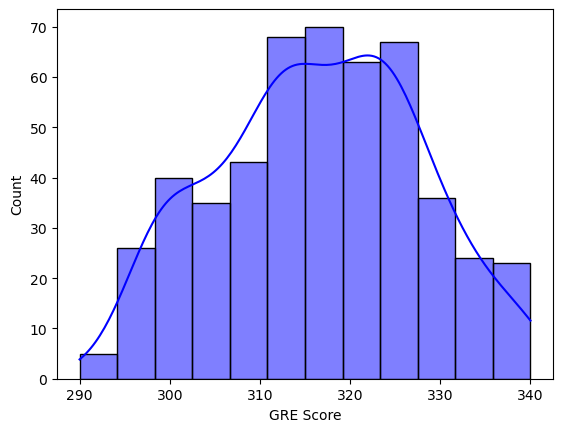

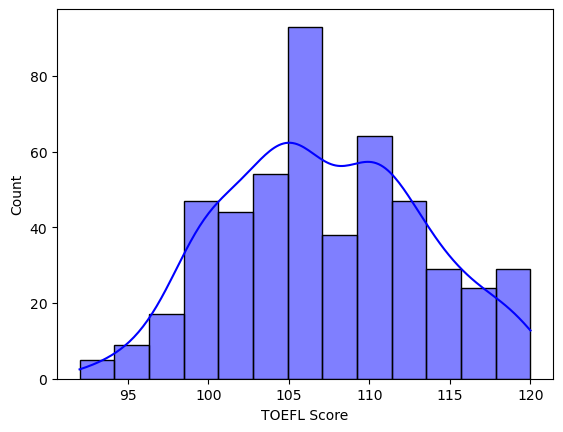

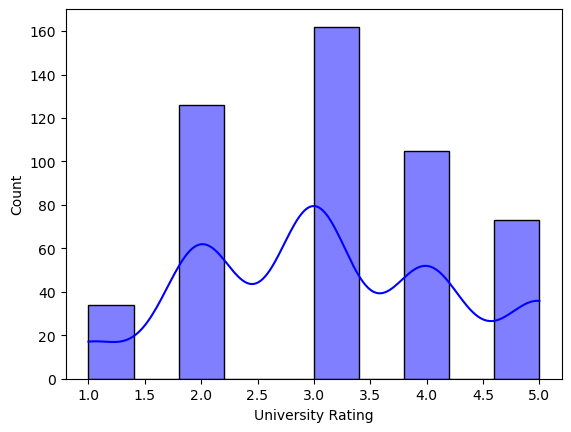

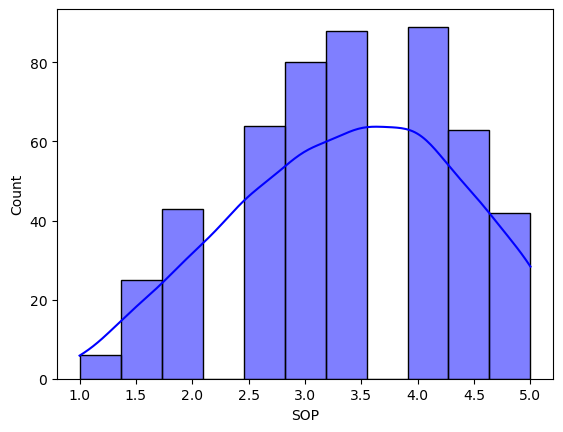

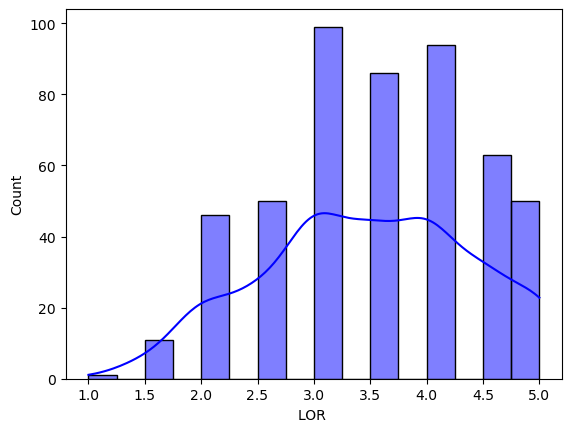

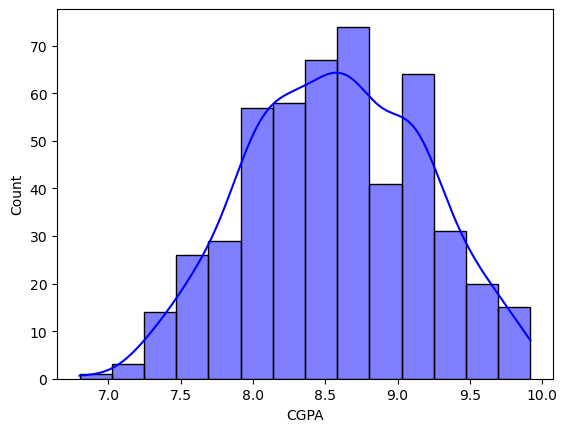

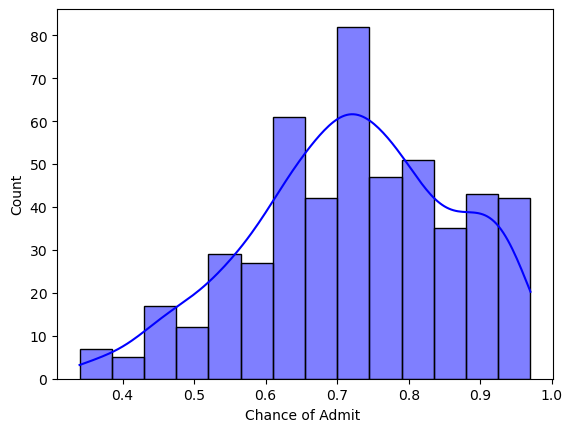

In [13]:
for i in univariate_list:
    sns.histplot(x=data[i],kde=True , color='blue')
    plt.show()

### Box plot

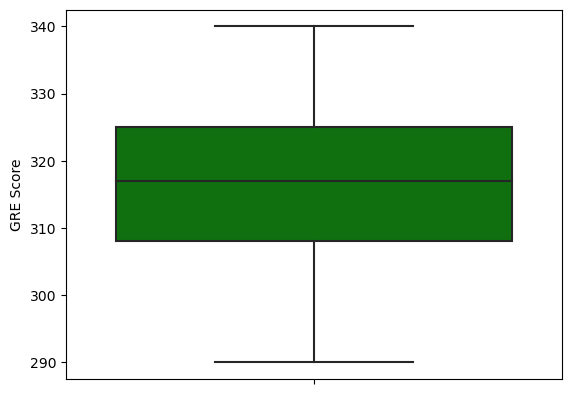

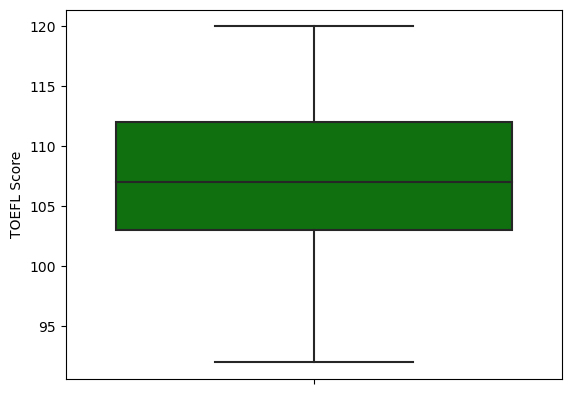

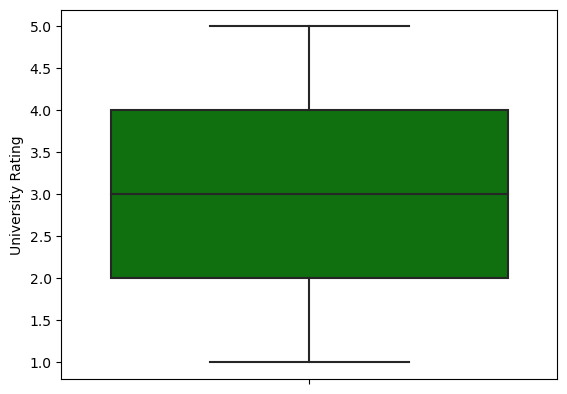

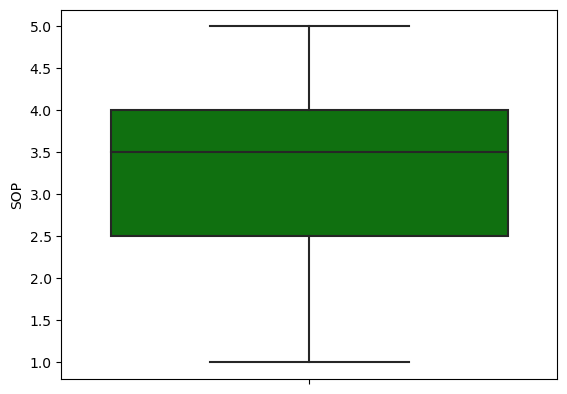

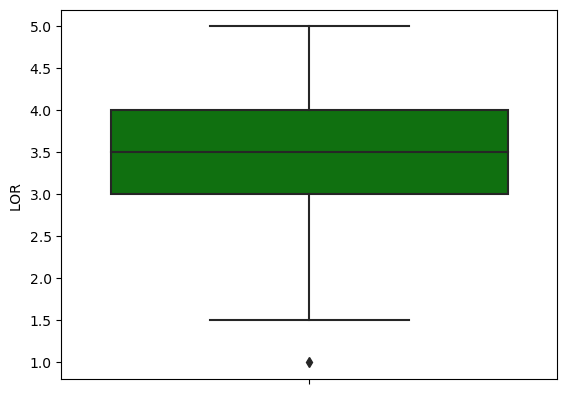

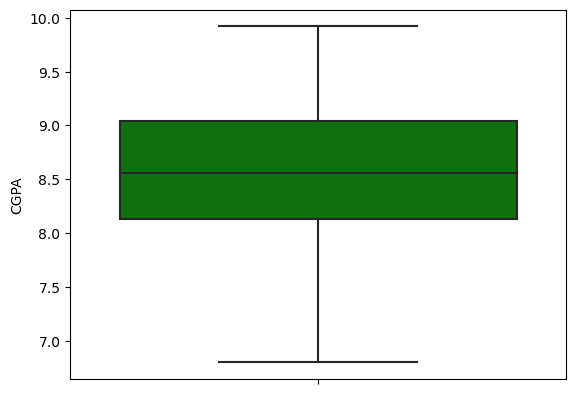

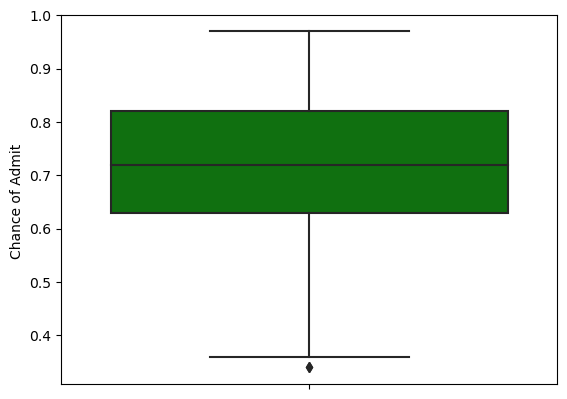

In [14]:
for  i in univariate_list:
    sns.boxplot(y=data[i], color='green')
    plt.show()

### Heat Map

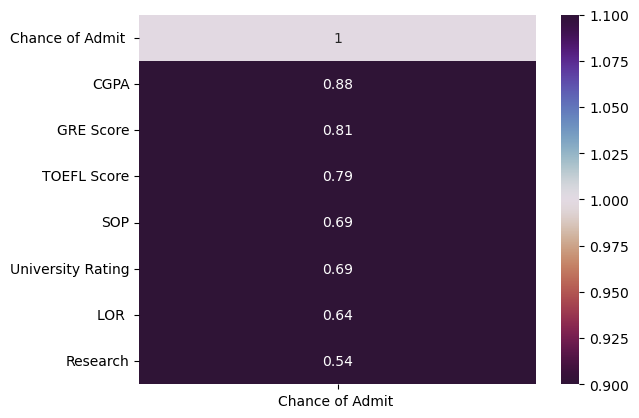

In [46]:
sns.heatmap(data.corr()[['Chance of Admit ']].sort_values(by= 'Chance of Admit ',ascending = False),vmax= 1,vmin = 1,annot = True,cmap= 'twilight_shifted_r')
plt.show()

### Multivariate Analysis

### Scatter plot

### selecting the featurs and Target

In [16]:
x=data.iloc[:,:-1].values
x

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 120.  ,   5.  , ...,   5.  ,   9.56,   1.  ],
       [312.  , 103.  ,   4.  , ...,   5.  ,   8.43,   0.  ],
       [327.  , 113.  ,   4.  , ...,   4.5 ,   9.04,   0.  ]])

In [17]:
y=data.iloc[:,-1].values
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

### Feature Scaling

In [18]:
sc = StandardScaler()

In [19]:
x = sc.fit_transform(x)
x

array([[ 1.81923762,  1.77886545,  0.77558214, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.66714832, -0.03160087,  0.77558214, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.0418297 , -0.52536441, -0.09979274, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.19888185,  2.10804114,  1.65095702, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39631872, -0.68995225,  0.77558214, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.93301508,  0.95592621,  0.77558214, ...,  1.09894429,
         0.76721964, -1.12815215]])

### Splitting the data model in to training and testing sets

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42, shuffle = True)
x_test.shape

(100, 7)

### Model Building

### Creating a Dictionary model for iterative purpose

In [21]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradiantBoosterRegressor":GradientBoostingRegressor(),
    "AdaBoostingRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(random_state=0)
}

### using for loop for model training and testing

In [22]:
for name,model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    traing_score=model.score(x_train,y_train)*100
    testing_score=model.score(x_test,y_test)*100
    score=r2_score(y_test,model.predict(x_test))*100
    mae=mean_absolute_error(y_test,model.predict(x_test))
    mse = mean_squared_error(y_test,model.predict(x_test))
    rsme = np.sqrt(mse)
    print("r2score:",score)
    print("training_score:",traing_score)
    print("testing_score:",testing_score)
    print("mae:",mae)
    print("mse:",mse)
    print("rsme_test:",rsme)
    print("*"*100)

model trained with LinearRegression
r2score: 81.88432567829629
training_score: 82.10671369321554
testing_score: 81.88432567829629
mae: 0.042722654277053664
mse: 0.00370465539878841
rsme_test: 0.060865880415783113
****************************************************************************************************
model trained with Ridge
r2score: 81.87987385531805
training_score: 82.1063070662641
testing_score: 81.87987385531805
mae: 0.04274636477332952
mse: 0.0037055657965874593
rsme_test: 0.06087335867674347
****************************************************************************************************
model trained with Lasso
r2score: -0.724844132029312
training_score: 0.0
testing_score: -0.724844132029312
mae: 0.116268
mse: 0.020598230624999995
rsme_test: 0.1435208369018241
****************************************************************************************************
model trained with LinearSVR
r2score: 81.27225262418209
training_score: 81.26641419796573
testing_score: 8

In [23]:
data.columns.unique()

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

### Outlier treatment on LOR and Chance of Admit


In [24]:
univariate =['LOR ','Chance of Admit ']

In [25]:
def outlier_limit(univariate):
    Q3,Q1=np.nanpercentile(univariate,[75,25])
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [26]:
for i in univariate :
    UL,LL = outlier_limit(data[i])
    data[i] = np.where((data[i]<LL),np.nan,data[i])

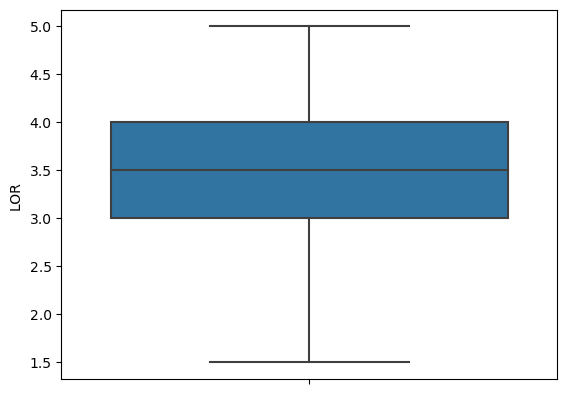

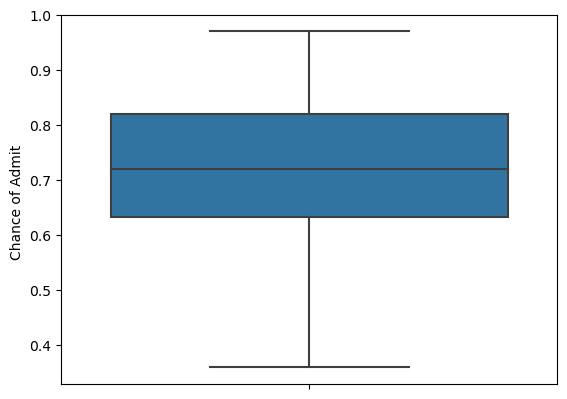

In [27]:
for i in univariate :
    sns.boxplot(y=data[i])
    plt.show()

#### initializing the model

In [28]:
model = Ridge()

### Fitting the model with training data

In [29]:
model.fit(x_train, y_train)

Ridge()

### Predicting using the test data¶

In [30]:
y_pred = model.predict(x_test)
y_pred

array([0.91421346, 0.79501448, 0.57311943, 0.70716309, 0.8156359 ,
       0.8619289 , 0.47460643, 0.64835725, 0.82326382, 0.80735384,
       0.72196907, 0.7257321 , 0.65681623, 0.93672995, 0.82367875,
       0.50965558, 0.83943706, 0.59717173, 0.53331231, 0.57190104,
       0.66557761, 0.55342797, 0.72227795, 0.79505027, 0.78027695,
       0.60246848, 0.94829028, 0.84740744, 0.62784478, 0.74359343,
       0.55565988, 0.72981324, 0.54499747, 0.86095311, 0.65754398,
       0.73720107, 0.55395028, 0.95705   , 0.64389034, 0.71061282,
       0.97000345, 0.575069  , 0.67055848, 0.85832271, 0.9408312 ,
       0.57772299, 0.95810604, 0.83902934, 0.79604254, 0.92561643,
       0.88783712, 0.5638189 , 0.70378863, 0.52689902, 0.95356959,
       0.59814323, 0.95544294, 0.73908449, 0.66238733, 0.50160895,
       0.62911705, 0.68012895, 0.59875938, 0.59284406, 0.4409371 ,
       0.5894012 , 0.86661146, 0.89774231, 0.65814598, 0.7063423 ,
       0.61772994, 0.78587545, 0.69111005, 0.56318436, 0.55388

### Evaluating the accuracy

In [31]:
r2_score(y_test, y_pred)

0.8187987385531805

In [32]:
model.score(x_test, y_test)

0.8187987385531805

In [33]:
model.score(x_train, y_train)

0.821063070662641

In [34]:
mean_absolute_error(y_test, y_pred)

0.04274636477332952

In [35]:
mean_squared_error(y_test, y_pred)

0.0037055657965874593

In [36]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.06087335867674347

In [37]:
OUTPUT = pd.DataFrame(zip(y_test, y_pred), columns=['ACTUAL', 'PREDICTION'])

In [38]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,0.93,0.914213
1,0.84,0.795014
2,0.39,0.573119
3,0.77,0.707163
4,0.74,0.815636


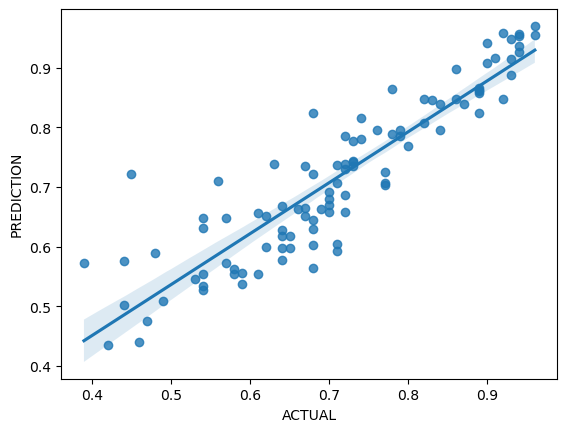

In [39]:
sns.regplot(data=OUTPUT, x='ACTUAL', y='PREDICTION')
plt.show()